In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 1: Load and Explore the Data
First, load the CSV into a Pandas DataFrame and check for missing values.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the CSV

In [3]:
df = pd.read_csv("quotes.csv")

## Display the first few rows

In [4]:
print(df.head())

            Author                                              Quote  \
0  Albert Einstein  “The world as we have created it is a process ...   
1  Albert Einstein  “The world as we have created it is a process ...   
2  Albert Einstein  “The world as we have created it is a process ...   
3  Albert Einstein  “The world as we have created it is a process ...   
4     J.K. Rowling  “It is our choices, Harry, that show what we t...   

            Tags  
0         change  
1  deep-thoughts  
2       thinking  
3          world  
4      abilities  


## Check for missing values

In [5]:
print(df.isnull().sum())

Author    0
Quote     0
Tags      3
dtype: int64


## Basic statistics

In [6]:
print(f"Total Quotes: {df.shape[0]}")
print(f"Unique Authors: {df['Author'].nunique()}")
print(f"Total Tags: {df['Tags'].nunique()}")

Total Quotes: 235
Unique Authors: 50
Total Tags: 137


# Step 2: Data Visualization

## Q️1 : Bar Chart: Top 10 Most Quoted Authors
- Count the number of quotes per author

In [7]:
top_authors = df["Author"].value_counts().head(10)

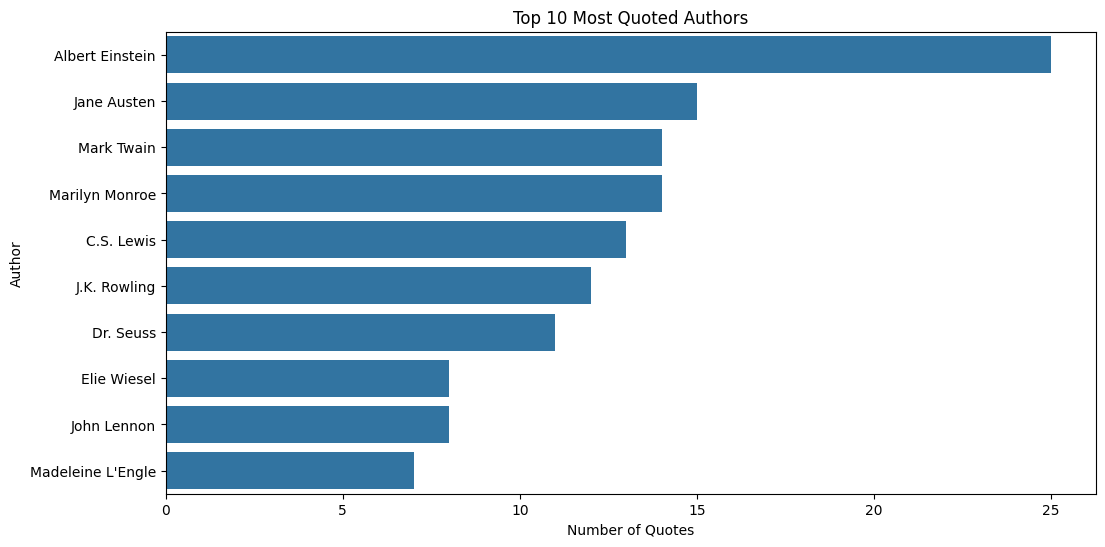

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.xlabel("Number of Quotes")
plt.ylabel("Author")
plt.title("Top 10 Most Quoted Authors")
plt.show()

## Q️2 : Word Cloud: Most Common Words in Quotes

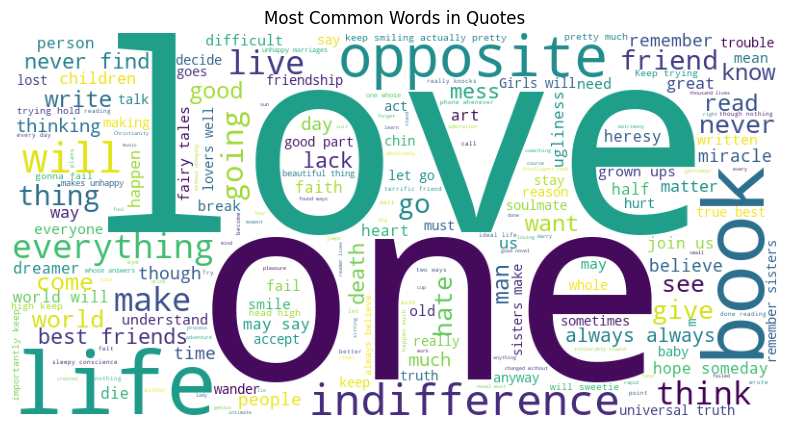

In [9]:
from wordcloud import WordCloud

text = " ".join(df['Quote'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Words in Quotes")
plt.show()

## Q3 : Pie Chart: Proportion of Top 5 Tags
- Count tag occurrences

In [10]:
top_tags = df["Tags"].value_counts().head(5)

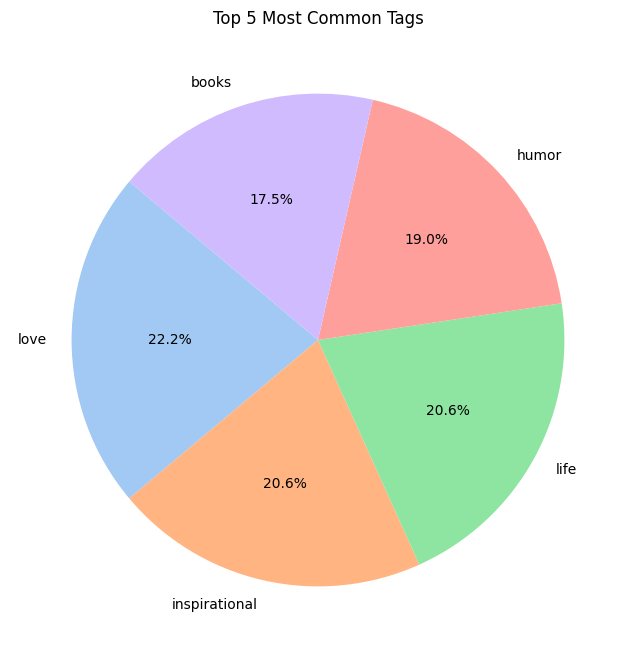

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(top_tags, labels=top_tags.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=140)
plt.title("Top 5 Most Common Tags")
plt.show()

## Q4 : Additional Visualization: Quotes Length Distribution

In [12]:
df["quote_length"] = df["Quote"].apply(len)

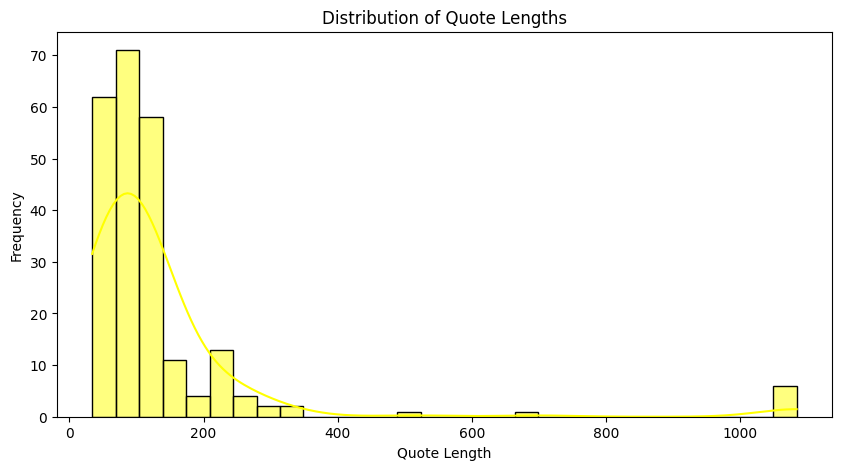

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df["quote_length"], bins=30, kde=True, color="Yellow")
plt.xlabel("Quote Length")
plt.ylabel("Frequency")
plt.title("Distribution of Quote Lengths")
plt.show()

## Q5 :Distribution of Quote Lengths
- Goal: Show how the length of quotes varies across the dataset.

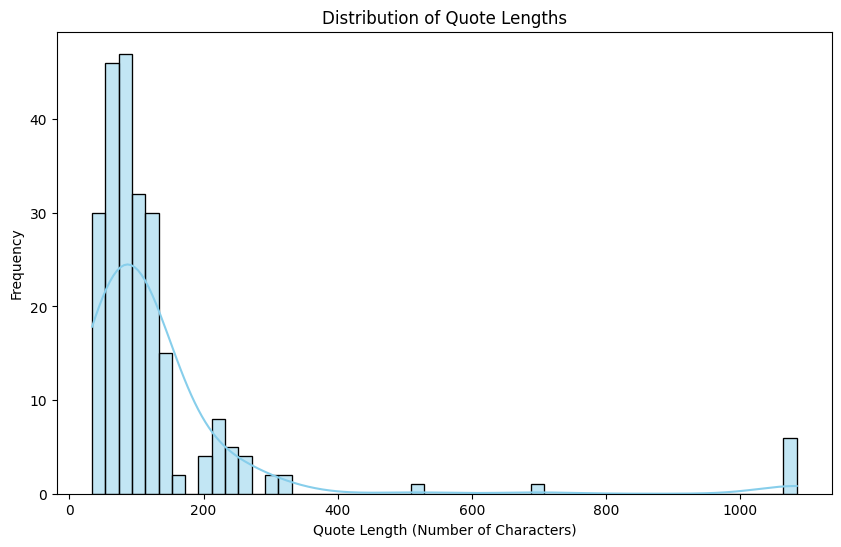

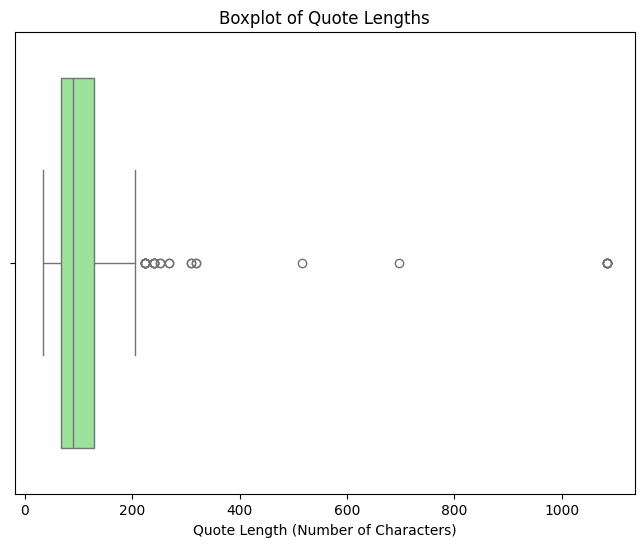

In [15]:
# Calculate the length of each quote
df['quote_length'] = df['Quote'].apply(len)

# Histogram of quote lengths
plt.figure(figsize=(10,6))
sns.histplot(df['quote_length'], kde=True, color='skyblue')
plt.title("Distribution of Quote Lengths")
plt.xlabel("Quote Length (Number of Characters)")
plt.ylabel("Frequency")
plt.show()

# Box plot of quote lengths
plt.figure(figsize=(8,6))
sns.boxplot(x=df['quote_length'], color='lightgreen')
plt.title("Boxplot of Quote Lengths")
plt.xlabel("Quote Length (Number of Characters)")
plt.show()


## Q6 : Quote Count per Tag
- Goal: Visualize which tags are associated with the most quotes.

C:\Users\singh\AppData\Local\Temp\ipykernel_16024\3494211074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_tags.index, y=top_10_tags.values, palette='Set2')


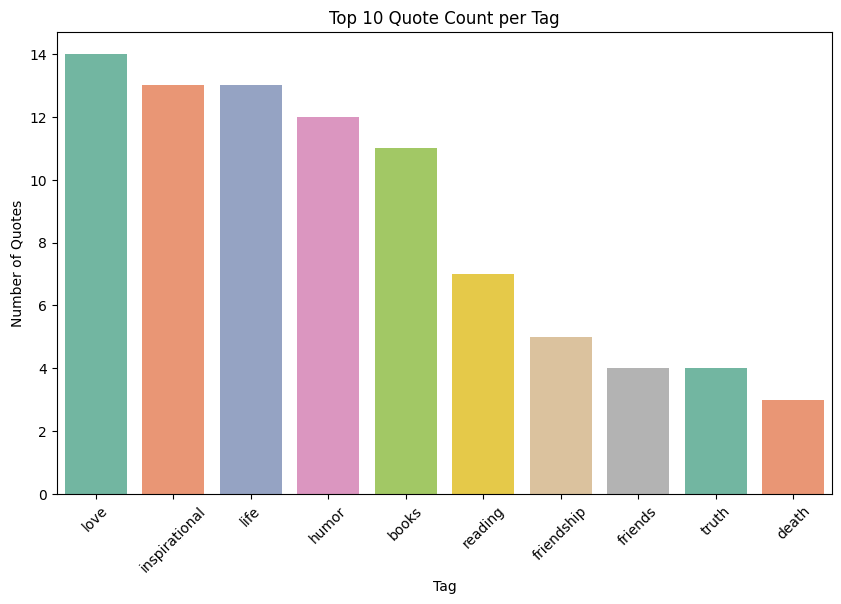

In [24]:
# Count the number of quotes for each tag
tag_counts = df['Tags'].value_counts()

# Select the top 10 most common tags
top_10_tags = tag_counts.head(10)

# Bar plot of quote count per tag (top 10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_tags.index, y=top_10_tags.values, palette='Set2')
plt.xticks(rotation=45)
plt.title("Top 10 Quote Count per Tag")
plt.xlabel("Tag")
plt.ylabel("Number of Quotes")
plt.show()



## Q7 : Quote Distribution by Author
- Goal: Show how the number of quotes varies by author.

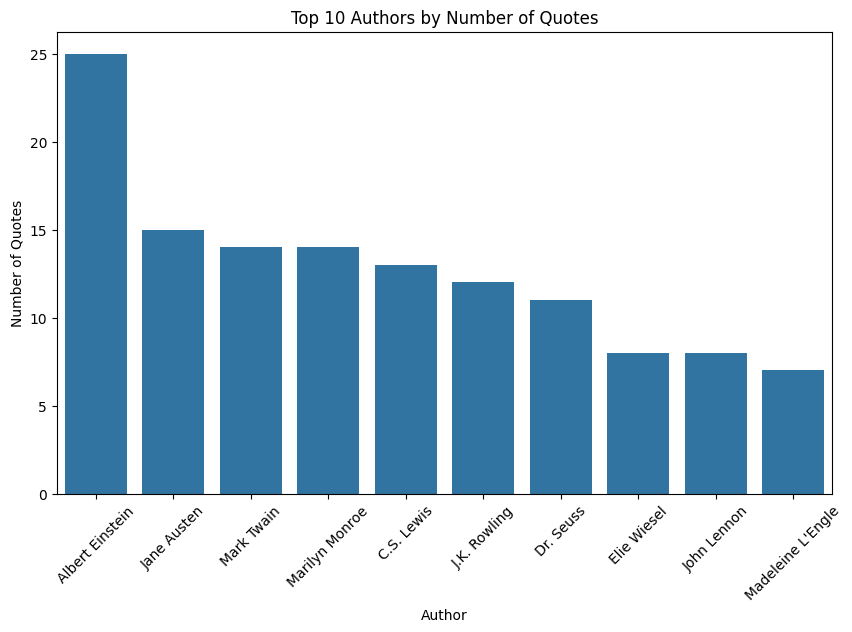

In [23]:
# Count quotes per author
author_counts = df['Author'].value_counts().head(10)

# Bar plot of quote counts per author
plt.figure(figsize=(10,6))
sns.barplot(x=author_counts.index, y=author_counts.values)
plt.xticks(rotation=45)
plt.title("Top 10 Authors by Number of Quotes")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.show()
